In [1]:
# %tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [16]:
train_labels[1:14]
# 0 	T-shirt/top
# 1 	Trouser
# 2 	Pullover
# 3 	Dress
# 4 	Coat
# 5 	Sandal
# 6 	Shirt
# 7 	Sneaker
# 8 	Bag
# 9 	Ankle boot



array([0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5], dtype=uint8)

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

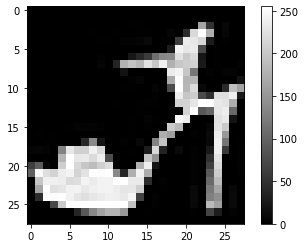

'Sandal'

In [36]:
plt.figure()
x=9
plt.imshow(train_images[x],cmap='gray')
plt.colorbar()
# plt.grid(True)
plt.show()
class_names[train_labels[x]]


In [ ]:
#data pre processing 
#squish input values between 0 and 1
# nnet starts with random value betweeen 0 and 1 : when huge difference between input range and weights more calc needed
# to attain vals that make sense
#
# DONT FORGET TO PREPROCESS TEST DATA ALSO